In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
file_path = "/Users/yiwenhou/Documents/Berkeley/207/ucb_mids_207_Final_Project_Food_Deserts" #update your own drive

df = pd.read_csv(f"{file_path}/regional_combined_centroids.csv")  # combined file with USDA and Centroids
df_mapping = pd.read_csv(f"{file_path}/mapping.csv") 


In [37]:
df_mapping

,Field,LongName,Description
0,CensusTract,Census tract,Census tract number
1,State,State,State name
2,County,County,County name
3,Urban,Urban tract,Flag for urban tract
4,POP2010,"Population, tract total",Population count from 2010 census
...,...,...,...
142,TractAIAN,Tract American Indian and Alaska Native popula...,Total count of American Indian and Alaska Nati...
143,TractOMultir,"Tract Other/Multiple race population, number",Total count of Other/Multiple race population ...
144,TractHispanic,"Tract Hispanic or Latino population, number",Total count of Hispanic or Latino population i...
145,TractHUNV,"Tract housing units without a vehicle, number",Total count of housing units without a vehicle...


In [11]:
df.shape

(7121, 151)

In [18]:
df.columns.to_list()

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [10]:
df['State'].unique() # covering 8 US southern states

array(['Georgia', 'South Carolina', 'Kentucky', 'Tennessee', 'Arkansas',
       'Alabama', 'Louisiana', 'Mississippi'], dtype=object)

In [22]:
sum(df['LILATracts_1And10']) #Flag for low-income and low access when considering low accessibilty at 1 and 10 miles

1563

In [24]:
sum(df['LILATracts_halfAnd10']) # Flag for low-income and low access when considering low accessibilty at 1/2 and 10 miles

2485

In [86]:
sum(df['LA1and10']&df['LowIncomeTracts']) # Flag for low-income and low access when considering low accessibilty at 1 and 20 miles

1563

In [30]:
sum(df['LowIncomeTracts'])

3726

In [31]:
corr_matrix = df.corr(numeric_only=True)

In [32]:
print(corr_matrix)

                   CensusTract     Urban   Pop2010   OHU2010  \
CensusTract           1.000000  0.028016  0.078160  0.087843   
Urban                 0.028016  1.000000  0.051738  0.080976   
Pop2010               0.078160  0.051738  1.000000  0.921816   
OHU2010               0.087843  0.080976  0.921816  1.000000   
GroupQuartersFlag     0.023879  0.047416 -0.029494 -0.197899   
...                        ...       ...       ...       ...   
TractHUNV            -0.005174  0.249124  0.132006  0.186559   
TractSNAP             0.039085  0.073190  0.331261  0.327846   
GEOID                 1.000000  0.028016  0.078160  0.087843   
latitude              0.270421 -0.085841  0.090829  0.124921   
longitude             0.309854 -0.029179  0.031727  0.038990   

                   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  \
CensusTract                 0.023879  0.009362  0.007990          -0.046507   
Urban                       0.047416  0.057648  0.076800           0.2262

In [40]:
# Step 4a: Unstack the matrix to turn it into a list of pairs
corr_pairs = corr_matrix.unstack()

# Step 4b: Remove self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs.drop_duplicates()

# Step 4c: Filter pairs with correlation above a threshold (e.g., 0.8)
high_corr = corr_pairs[abs(corr_pairs) > 0.8]

# Display highly correlated pairs
high_corr_sorted = high_corr.sort_values(ascending=False)


In [42]:
high_corr_sorted.head(20)

lanhopi20         lanhopi20share        1.000000
CensusTract       GEOID                 1.000000
laasian20share    lanhopi20             0.999090
LA1and20          LATracts1             0.999086
HUNVFlag          LATractsVehicle_20    0.998950
lapop20share      lakids20share         0.997943
lapop20           lakids20              0.995448
laasian20         laasian20share        0.992863
lapop20share      lalowi20share         0.992802
laaianhalf        laaian1               0.992319
lalowi20share     lakids20share         0.991496
lapop20share      lawhite20share        0.991277
laaianhalfshare   laaian1share          0.991121
LAPOP1_10         LAPOP1_20             0.991040
LALOWI1_10        LALOWI1_20            0.988935
laasian20         lanhopi20share        0.987621
                  lanhopi20             0.987621
lakids20share     lawhite20share        0.986932
laaianhalf        TractAIAN             0.986524
laseniors20share  lawhite20share        0.986286
dtype: float64

In [53]:
df_mapping.loc[df_mapping['Field']=='lanhopi20share','Description']

124    Share of tract population that are Native Hawa...
Name: Description, dtype: object

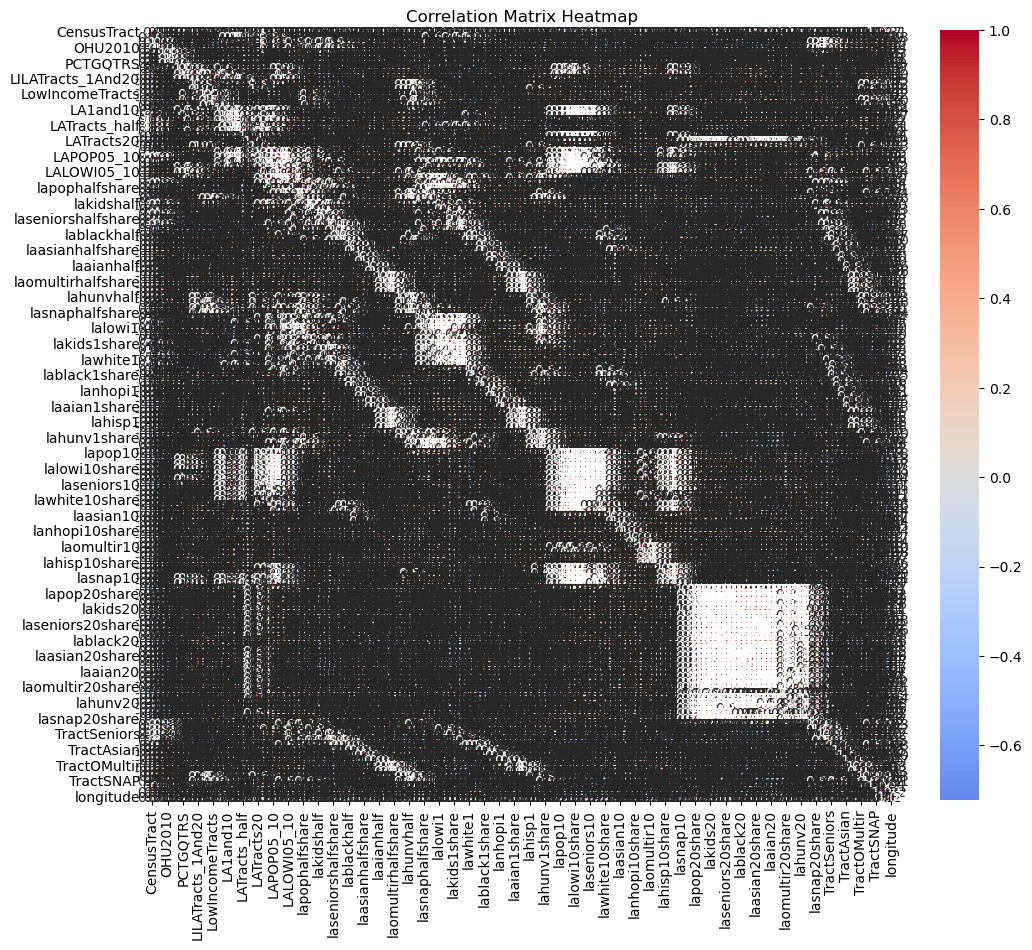

In [45]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [57]:
sum(df['LILATracts_1And10']==(df['LA1and10']&df['LowIncomeTracts'])) # LILATracts_1And10 = LowIncomeTracts&LA1and10

7121

In [63]:
df.groupby('State')['LILATracts_1And10'].count().sort_values(ascending = False)

State
Tennessee         1284
Georgia           1248
Alabama            933
Kentucky           916
South Carolina     883
Louisiana          856
Arkansas           547
Mississippi        454
Name: LILATracts_1And10, dtype: int64

In [67]:
df['CensusTract'].nunique()

7121

In [68]:
df.groupby('State')['CensusTract'].nunique().sort_values(ascending=False)


State
Tennessee         1284
Georgia           1248
Alabama            933
Kentucky           916
South Carolina     883
Louisiana          856
Arkansas           547
Mississippi        454
Name: CensusTract, dtype: int64

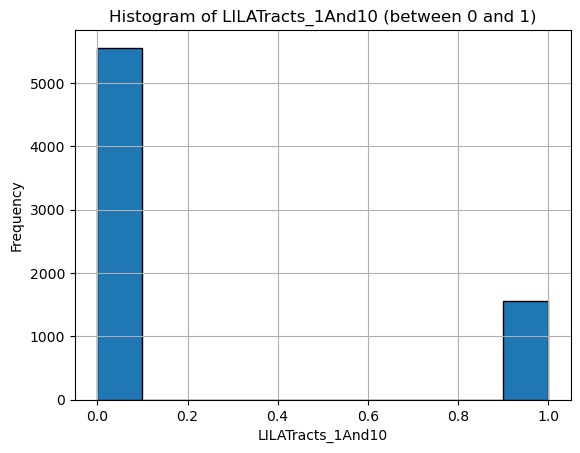

In [69]:


# Filter values between 0 and 1
filtered = df['LILATracts_1And10'][(df['LILATracts_1And10'] >= 0) & (df['LILATracts_1And10'] <= 1)]

# Plot histogram
plt.hist(filtered, bins=10, edgecolor='black')
plt.title('Histogram of LILATracts_1And10 (between 0 and 1)')
plt.xlabel('LILATracts_1And10')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

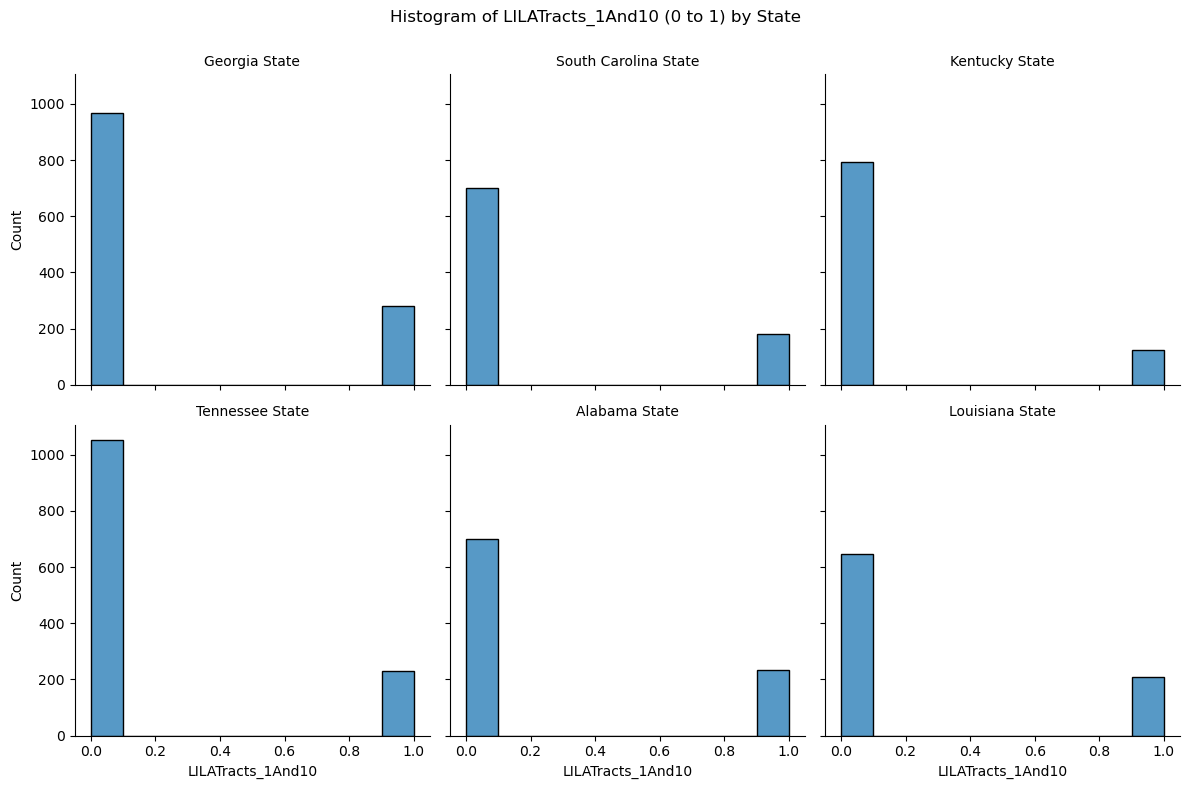

In [73]:

# Filter between 0 and 1
df_filtered = df[(df['LILATracts_1And10'] >= 0) & (df['LILATracts_1And10'] <= 1)]

# Optional: limit to top 6 states
top_states = df_filtered['State'].value_counts().head(6).index
df_filtered = df_filtered[df_filtered['State'].isin(top_states)]

# Facet grid
g = sns.FacetGrid(df_filtered, col='State', col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='LILATracts_1And10', bins=10)
g.set_titles(col_template="{col_name} State")
g.set_axis_labels("LILATracts_1And10", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Histogram of LILATracts_1And10 (0 to 1) by State")
plt.show()


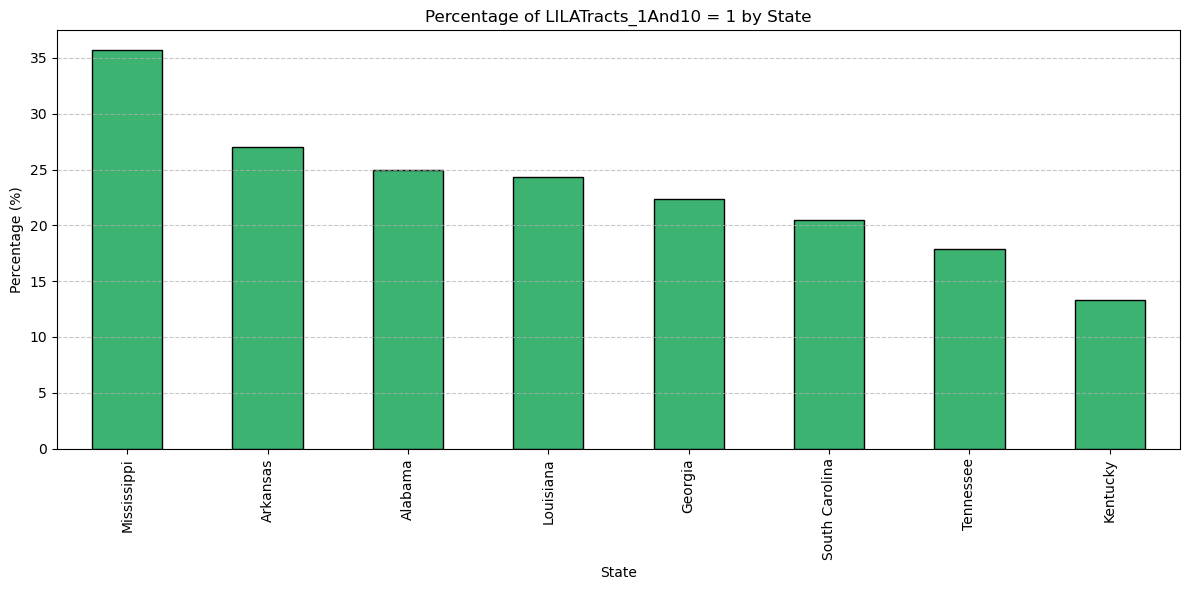

In [77]:
# Total tracts per state
total_counts = df.groupby('State').size()

# Tracts with LILATracts_1And10 == 1
one_counts = df[df['LILATracts_1And10'] == 1].groupby('State').size()

# Calculate percentage
percent_1 = (one_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
percent_1.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Percentage of LILATracts_1And10 = 1 by State')
plt.ylabel('Percentage (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

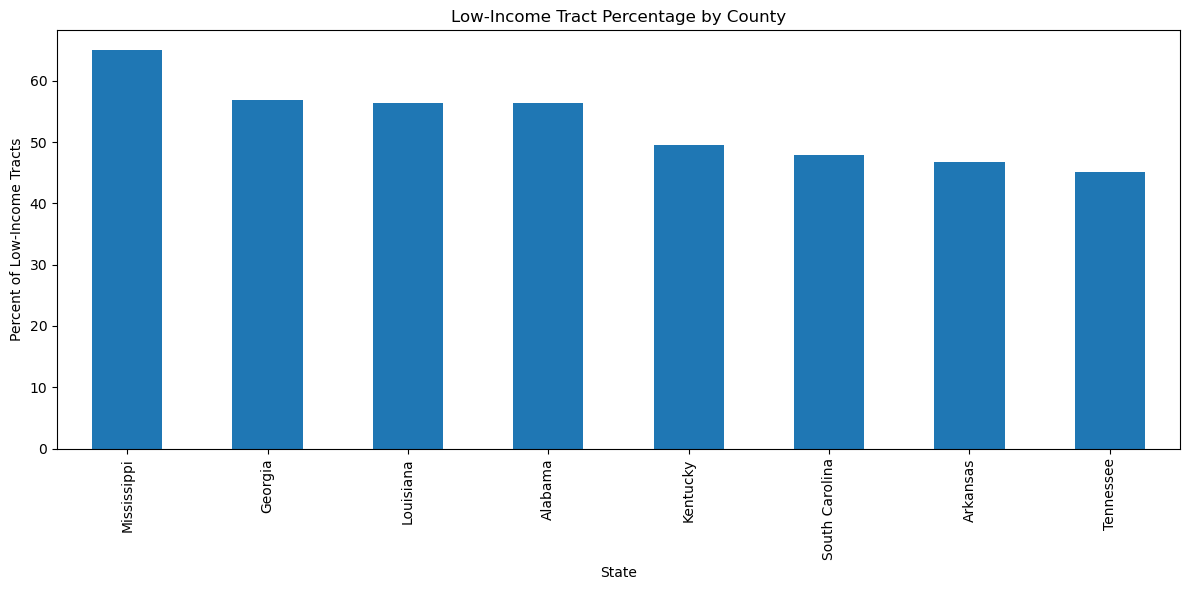

In [80]:


# Group by county (replace 'CountyName' with your actual column name)
# Calculate % of low-income tracts
low_income_pct = (
    df.groupby("State")["LowIncomeTracts"]
    .mean()  # mean of 1s = proportion
    .sort_values(ascending=False)
    * 100
)

# Plot
plt.figure(figsize=(12, 6))
low_income_pct.plot(kind="bar")
plt.ylabel("Percent of Low-Income Tracts")
plt.title("Low-Income Tract Percentage by County")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

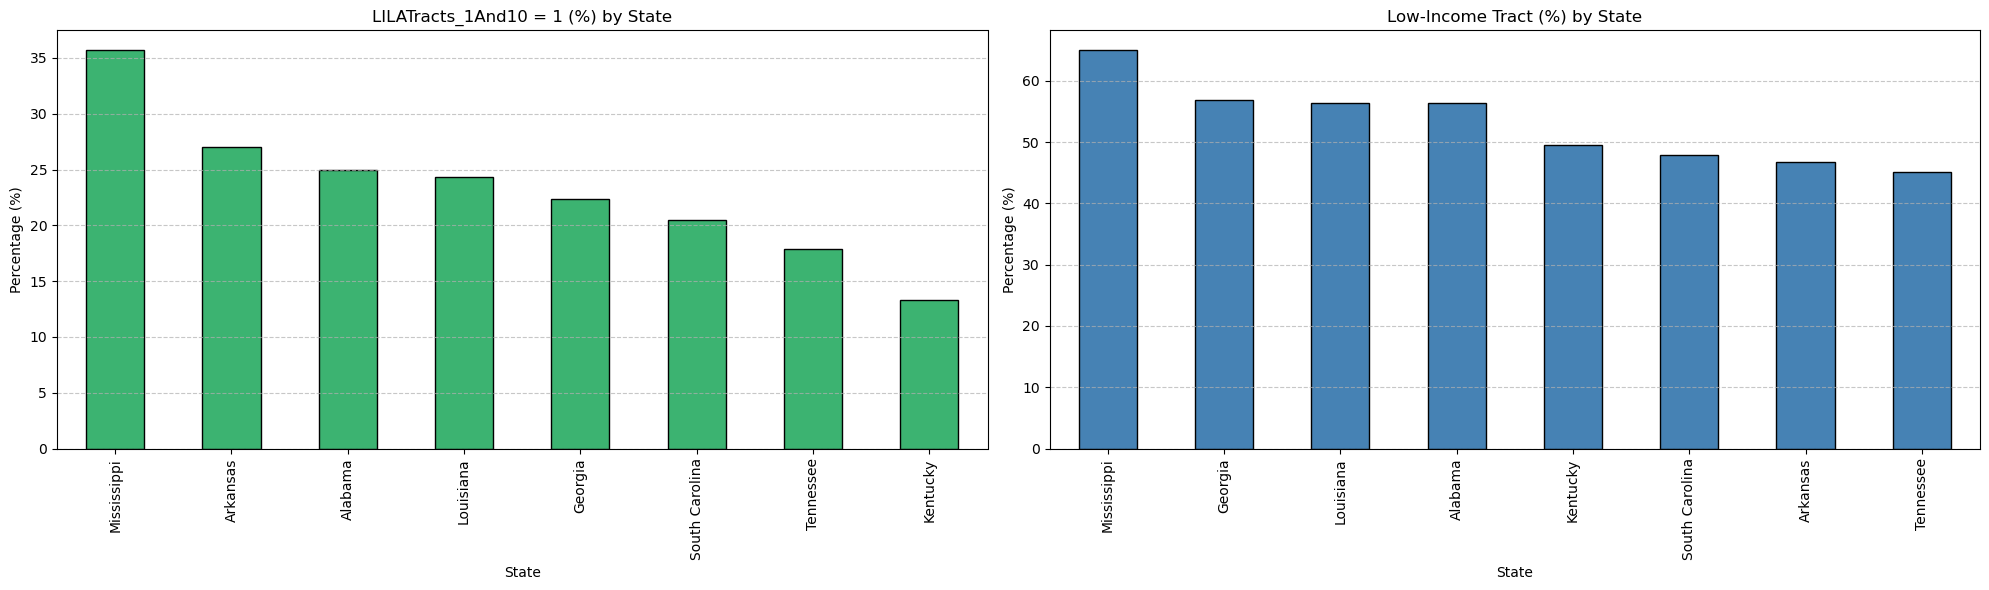

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_file.csv")  # uncomment if needed

# ====== Plot 1: LILATracts_1And10 Percentage by State ======
total_counts = df.groupby('State').size()
one_counts = df[df['LILATracts_1And10'] == 1].groupby('State').size()
percent_1 = (one_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

# ====== Plot 2: Low-Income Tracts Percentage by State ======
low_income_pct = (
    df.groupby("State")["LowIncomeTracts"]
    .mean()
    .sort_values(ascending=False)
    * 100
)

# ====== Combine in one figure using subplots ======
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot 1: LILATracts
percent_1.plot(kind='bar', ax=axes[0], color='mediumseagreen', edgecolor='black')
axes[0].set_title('LILATracts_1And10 = 1 (%) by State')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('State')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Low-Income Tracts
low_income_pct.plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Low-Income Tract (%) by State')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
